In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.initializers import HeUniform
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.initializers import he_uniform
from flask_cors import CORS
from flask import Flask, request, jsonify
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
def make_model(over_data):
    df = pd.DataFrame(over_data)

    scaler = MinMaxScaler()

    # Fit the scaler on your data and transform the data to be normalized between 0 and 1
    normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

    pred_x = normalized_df.tail(1)

    normalized_df = normalized_df.drop(normalized_df.index[-1])

    y = normalized_df[2]
    # pred_y = pred_x[2]

    del normalized_df[2]
    del pred_x[2]

    X = normalized_df
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    input_dim = 4
    model = Sequential()
    model.add(Dense(500, input_dim=input_dim, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2'))  
    model.add(Dropout(0.3))
    model.add(Dense(500, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2')) 
    model.add(Dropout(0.3))
    model.add(Dense(250, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2'))  
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))

    # Compile the model
    opt = Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  

    # Define early stopping
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

    # Fit the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, batch_size=16, verbose=1, callbacks=[es])

    # Evaluate the model
    train_loss = model.evaluate(X_train, y_train, verbose=0)
    test_loss = model.evaluate(X_test, y_test, verbose=0)

    print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

    predictions_scaled = model.predict(pred_x)

    pred_df = pd.DataFrame(predictions_scaled)
  
    pred_df[1] = 0
    pred_df[2] = 0
    pred_df[3] = 0
    pred_df[4] = 0

    # predictions_scaled = predictions_scaled.reshape(-1, 1)  # Adjust the shape as needed

    # Inverse transform to get predictions in the original scale
    predictions_original_scale = scaler.inverse_transform(pred_df)

    final_prediction = predictions_original_scale[0][0]
    print("Final Prediction: " + str(final_prediction))

    # Assuming your model.predict() function gives the predictions
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    # Calculate Mean Squared Error
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test = mean_squared_error(y_test, predictions_test)

    # Calculate R-squared
    r2_train = r2_score(y_train, predictions_train)
    r2_test = r2_score(y_test, predictions_test)

    print('Mean Squared Error (Train):', mse_train)
    print('Mean Squared Error (Test):', mse_test)
    print('R-squared (Train):', r2_train)
    print('R-squared (Test):', r2_test)

    # Assuming predictions_test contains your model's predictions for the test set
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, predictions_test, color='blue', label='Actual vs. Predicted')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.legend()
    plt.show()

    return final_prediction
    

In [14]:
# pip install --user flask_cors
# over_data = None

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.26:5000
Press CTRL+C to quit


Epoch 1/1500
2/2 [==============================] - 1s 207ms/step - loss: 25.8871 - val_loss: 25.0830
Epoch 2/1500
2/2 [==============================] - 0s 30ms/step - loss: 25.7088 - val_loss: 24.0004
Epoch 3/1500
2/2 [==============================] - 0s 30ms/step - loss: 24.4569 - val_loss: 24.2904
Epoch 4/1500
2/2 [==============================] - 0s 33ms/step - loss: 24.6198 - val_loss: 23.1682
Epoch 5/1500
2/2 [==============================] - 0s 30ms/step - loss: 23.2083 - val_loss: 22.6761
Epoch 6/1500
2/2 [==============================] - 0s 29ms/step - loss: 23.0364 - val_loss: 22.4491
Epoch 7/1500
2/2 [==============================] - 0s 32ms/step - loss: 22.5572 - val_loss: 22.0126
Epoch 8/1500
2/2 [==============================] - 0s 35ms/step - loss: 22.3413 - val_loss: 21.5492
Epoch 9/1500
2/2 [==============================] - 0s 36ms/step - loss: 21.7259 - val_loss: 21.3279
Epoch 10/1500
2/2 [==============================] - 0s 33ms/step - loss: 21.4848 - val_lo

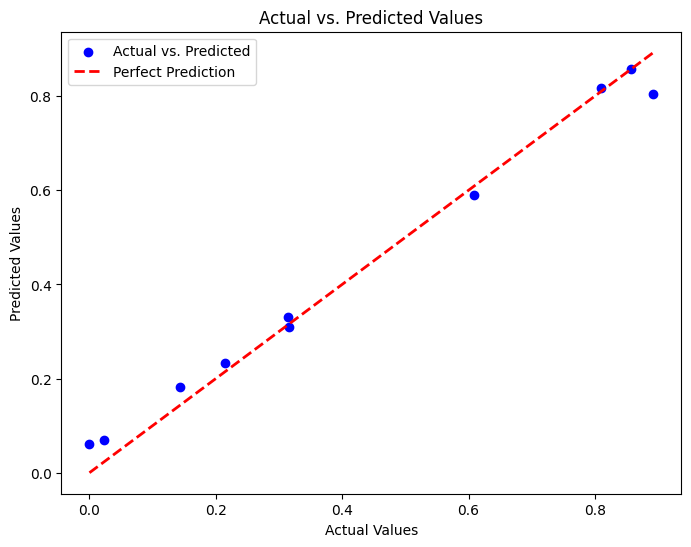

192.168.1.26 - - [11/Dec/2023 17:54:00] "POST /upload HTTP/1.1" 200 -


Epoch 1/1500
2/2 [==============================] - 1s 125ms/step - loss: 26.2571 - val_loss: 24.9792
Epoch 2/1500
2/2 [==============================] - 0s 31ms/step - loss: 25.1537 - val_loss: 24.2433
Epoch 3/1500
2/2 [==============================] - 0s 28ms/step - loss: 24.7036 - val_loss: 24.0176
Epoch 4/1500
2/2 [==============================] - 0s 29ms/step - loss: 24.4746 - val_loss: 23.3334
Epoch 5/1500
2/2 [==============================] - 0s 27ms/step - loss: 23.8516 - val_loss: 22.9791
Epoch 6/1500
2/2 [==============================] - 0s 28ms/step - loss: 23.0757 - val_loss: 22.5522
Epoch 7/1500
2/2 [==============================] - 0s 28ms/step - loss: 23.1279 - val_loss: 22.2284
Epoch 8/1500
2/2 [==============================] - 0s 28ms/step - loss: 22.3385 - val_loss: 21.9609
Epoch 9/1500
2/2 [==============================] - 0s 29ms/step - loss: 22.2034 - val_loss: 21.5167
Epoch 10/1500
2/2 [==============================] - 0s 28ms/step - loss: 22.1192 - val_lo

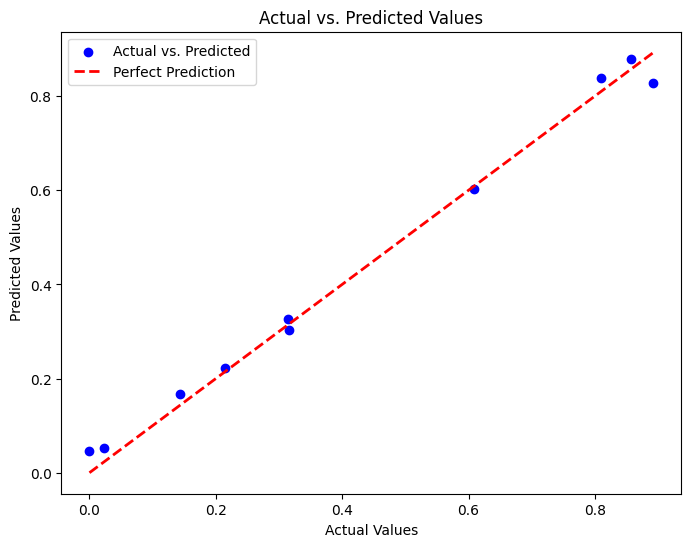

192.168.1.26 - - [11/Dec/2023 18:04:00] "POST /upload HTTP/1.1" 200 -


In [3]:

app = Flask(__name__)
CORS(app, resources={r"/upload": {"origins": "http://localhost:3000"}})

@app.route('/upload', methods=['POST'])
def upload():
    # global over_data  # Declare over_data as a global variable
    data = request.get_json()
    numbers = data.get('numbers', [])
    
    # Process the array of numbers as needed
    result = {'message': 'Numbers received successfully', 'data': numbers}
    
    # over_data = numbers  # Assign the value to the global variable
    pred = make_model(numbers)

    return jsonify(str(pred))

if __name__ == '__main__':
    app.run(host='0.0.0.0', port=5000)


In [16]:
print(over_data)

[[36.275002, 38.189999, 39.162498, 36.067501, 2615927200.0], [38.2925, 36.005001, 38.994999, 35.549999, 2736712400.0], [36.220001, 37.182499, 38.497501, 35.602501, 1688047600.0], [37.275002, 41.0, 41.130001, 37.102501, 2644276000.0], [41.200001, 38.529999, 41.235001, 37.290001, 2721496400.0], [38.564999, 42.259998, 42.412498, 38.115002, 2017165200.0], [42.467499, 42.962502, 44.060001, 41.32, 2402653600.0], [42.487499, 42.307499, 44.299999, 41.615002, 2124735200.0], [42.540001, 41.857498, 45.025002, 41.174999, 2638717600.0], [41.7925, 44.529999, 45.154999, 37.560001, 3711577200.0], [44.634998, 41.945, 45.875, 41.235001, 2854910800.0], [41.66, 41.314999, 44.735001, 40.157501, 2664617200.0], [41.602501, 46.717499, 47.592499, 41.317501, 2483905200.0], [46.997501, 46.2775, 48.549999, 45.182499, 2110498000.0], [45.955002, 47.572498, 48.990002, 45.855, 1574765600.0], [49.782501, 56.907501, 57.217499, 49.327499, 2801275600.0], [57.102501, 56.435001, 57.4175, 53.825001, 2715888000.0], [56.98749

In [65]:
df = pd.DataFrame(over_data)

In [66]:
scaler = MinMaxScaler()

# Fit the scaler on your data and transform the data to be normalized between 0 and 1
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)



           0         1         2         3         4
0   0.000548  0.019890  0.005964  0.005660  0.221274
1   0.020647  0.000000  0.004462  0.000499  0.246944
2   0.000000  0.010719  0.000000  0.001022  0.024075
3   0.010510  0.045469  0.023609  0.015983  0.227299
4   0.049611  0.022985  0.024551  0.017854  0.243710
5   0.023361  0.056939  0.035111  0.026082  0.094021
6   0.062238  0.063333  0.049887  0.058049  0.175948
7   0.062438  0.057371  0.052039  0.060991  0.116883
8   0.062961  0.053275  0.058541  0.056603  0.226117
9   0.055514  0.077602  0.059707  0.020547  0.454128
10  0.083831  0.054071  0.066164  0.057201  0.272064
11  0.054194  0.048336  0.055940  0.046454  0.231622
12  0.053621  0.097515  0.081568  0.058024  0.193216
13  0.107367  0.093510  0.090155  0.096574  0.113857
14  0.096981  0.105298  0.094101  0.103281  0.000000
15  0.135112  0.190274  0.167889  0.137916  0.260665
16  0.208034  0.185972  0.169682  0.182775  0.242518
17  0.206889  0.170315  0.178202  0.159809  0.

In [67]:
pred_x = normalized_df.tail(1)
print(pred_x)

      0    1    2    3         4
50  1.0  1.0  1.0  1.0  0.073154


In [68]:
normalized_df = normalized_df.drop(normalized_df.index[-1])
print(normalized_df)

           0         1         2         3         4
0   0.000548  0.019890  0.005964  0.005660  0.221274
1   0.020647  0.000000  0.004462  0.000499  0.246944
2   0.000000  0.010719  0.000000  0.001022  0.024075
3   0.010510  0.045469  0.023609  0.015983  0.227299
4   0.049611  0.022985  0.024551  0.017854  0.243710
5   0.023361  0.056939  0.035111  0.026082  0.094021
6   0.062238  0.063333  0.049887  0.058049  0.175948
7   0.062438  0.057371  0.052039  0.060991  0.116883
8   0.062961  0.053275  0.058541  0.056603  0.226117
9   0.055514  0.077602  0.059707  0.020547  0.454128
10  0.083831  0.054071  0.066164  0.057201  0.272064
11  0.054194  0.048336  0.055940  0.046454  0.231622
12  0.053621  0.097515  0.081568  0.058024  0.193216
13  0.107367  0.093510  0.090155  0.096574  0.113857
14  0.096981  0.105298  0.094101  0.103281  0.000000
15  0.135112  0.190274  0.167889  0.137916  0.260665
16  0.208034  0.185972  0.169682  0.182775  0.242518
17  0.206889  0.170315  0.178202  0.159809  0.

In [69]:
y = normalized_df[2]
print(y)
pred_y = pred_x[2]
print(pred_y)

0     0.005964
1     0.004462
2     0.000000
3     0.023609
4     0.024551
5     0.035111
6     0.049887
7     0.052039
8     0.058541
9     0.059707
10    0.066164
11    0.055940
12    0.081568
13    0.090155
14    0.094101
15    0.167889
16    0.169682
17    0.178202
18    0.153293
19    0.069393
20    0.033654
21    0.049057
22    0.097980
23    0.122172
24    0.137486
25    0.106679
26    0.151073
27    0.143584
28    0.162395
29    0.214704
30    0.255622
31    0.313849
32    0.389812
33    0.388399
34    0.336338
35    0.315105
36    0.381718
37    0.489653
38    0.609112
39    0.829600
40    0.892200
41    0.779287
42    0.748795
43    0.899464
44    0.955965
45    0.891303
46    0.809152
47    0.884039
48    0.857133
49    0.887088
Name: 2, dtype: float64
50    1.0
Name: 2, dtype: float64


In [70]:
del normalized_df[2]
del pred_x[2]
print(normalized_df)
print(pred_x)

           0         1         3         4
0   0.000548  0.019890  0.005660  0.221274
1   0.020647  0.000000  0.000499  0.246944
2   0.000000  0.010719  0.001022  0.024075
3   0.010510  0.045469  0.015983  0.227299
4   0.049611  0.022985  0.017854  0.243710
5   0.023361  0.056939  0.026082  0.094021
6   0.062238  0.063333  0.058049  0.175948
7   0.062438  0.057371  0.060991  0.116883
8   0.062961  0.053275  0.056603  0.226117
9   0.055514  0.077602  0.020547  0.454128
10  0.083831  0.054071  0.057201  0.272064
11  0.054194  0.048336  0.046454  0.231622
12  0.053621  0.097515  0.058024  0.193216
13  0.107367  0.093510  0.096574  0.113857
14  0.096981  0.105298  0.103281  0.000000
15  0.135112  0.190274  0.137916  0.260665
16  0.208034  0.185972  0.182775  0.242518
17  0.206889  0.170315  0.159809  0.336690
18  0.184723  0.078649  0.070467  0.482549
19  0.098575  0.031223  0.011445  0.429499
20  0.024930  0.051022  0.000000  0.369282
21  0.054991  0.066292  0.059670  0.067030
22  0.07322

In [71]:
X = normalized_df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [72]:
print(X_train)

           0         1         3         4
32  0.376967  0.376610  0.375898  0.288951
39  0.717075  0.846889  0.722048  0.530315
21  0.054991  0.066292  0.059670  0.067030
36  0.352087  0.395794  0.358692  0.261656
19  0.098575  0.031223  0.011445  0.429499
42  0.726141  0.755951  0.716338  0.116485
49  0.885236  0.918984  0.874028  0.006764
26  0.145173  0.157071  0.140659  0.068145
22  0.073222  0.104524  0.068572  0.218723
13  0.107367  0.093510  0.096574  0.113857
41  0.811118  0.663192  0.720327  0.280513
17  0.206889  0.170315  0.159809  0.336690
45  0.971608  0.776068  0.826750  0.055063
24  0.161885  0.070661  0.082261  0.293936
23  0.116457  0.128920  0.115649  0.095574
4   0.049611  0.022985  0.017854  0.243710
33  0.397041  0.294342  0.285184  0.306997
14  0.096981  0.105298  0.103281  0.000000
30  0.260659  0.280438  0.267205  0.046450
10  0.083831  0.054071  0.057201  0.272064
28  0.153292  0.181944  0.155147  0.126560
44  0.969317  0.873470  0.906443  0.141566
34  0.34220

In [73]:
input_dim = 4
model = Sequential()
model.add(Dense(500, input_dim=input_dim, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2'))  
model.add(Dropout(0.3))
model.add(Dense(500, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2')) 
model.add(Dropout(0.3))
model.add(Dense(250, activation='relu', kernel_initializer=he_uniform(), kernel_regularizer='l2'))  
model.add(Dropout(0.3))
model.add(Dense(1, activation='linear'))

# Compile the model
opt = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=opt)  

# Define early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# Fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=1500, batch_size=16, verbose=1, callbacks=[es])

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print('Train Loss: %.3f, Test Loss: %.3f' % (train_loss, test_loss))

Epoch 1/1500
2/2 [==============================] - 1s 134ms/step - loss: 26.5021 - val_loss: 25.6010
Epoch 2/1500
2/2 [==============================] - 0s 29ms/step - loss: 25.6366 - val_loss: 24.3226
Epoch 3/1500
2/2 [==============================] - 0s 31ms/step - loss: 24.5812 - val_loss: 23.9950
Epoch 4/1500
2/2 [==============================] - 0s 33ms/step - loss: 24.1597 - val_loss: 23.4374
Epoch 5/1500
2/2 [==============================] - 0s 46ms/step - loss: 23.5705 - val_loss: 23.1387
Epoch 6/1500
2/2 [==============================] - 0s 37ms/step - loss: 23.1640 - val_loss: 22.7166
Epoch 7/1500
2/2 [==============================] - 0s 29ms/step - loss: 22.7962 - val_loss: 22.2758
Epoch 8/1500
2/2 [==============================] - 0s 33ms/step - loss: 22.4155 - val_loss: 22.0115
Epoch 9/1500
2/2 [==============================] - 0s 32ms/step - loss: 21.9289 - val_loss: 21.6698
Epoch 10/1500
2/2 [==============================] - 0s 30ms/step - loss: 21.7138 - val_lo

In [74]:
print(pred_x)

      0    1    3         4
50  1.0  1.0  1.0  0.073154


In [84]:
predictions_scaled = model.predict(pred_x)

pred_df = pd.DataFrame(predictions_scaled)
print(pred_df)
pred_df[1] = 0
pred_df[2] = 0
pred_df[3] = 0
pred_df[4] = 0

# predictions_scaled = predictions_scaled.reshape(-1, 1)  # Adjust the shape as needed

# Inverse transform to get predictions in the original scale
predictions_original_scale = scaler.inverse_transform(pred_df)
print(predictions_original_scale)

1/1 [==============================] - 0s 24ms/step
          0
0  0.977493
[[1.34340746e+02 3.60050010e+01 3.84975010e+01 3.55000000e+01
  1.57476560e+09]]


In [87]:
final_prediction = predictions_original_scale[0][0]
print(final_prediction)

134.34074605079093


In [75]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming your model.predict() function gives the predictions
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

# Calculate Mean Squared Error
mse_train = mean_squared_error(y_train, predictions_train)
mse_test = mean_squared_error(y_test, predictions_test)

# Calculate R-squared
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('Mean Squared Error (Train):', mse_train)
print('Mean Squared Error (Test):', mse_test)
print('R-squared (Train):', r2_train)
print('R-squared (Test):', r2_test)


1/1 [==============================] - 0s 19ms/step
Mean Squared Error (Train): 0.0007482943206350205
Mean Squared Error (Test): 0.0011585191169677976
R-squared (Train): 0.9921907048127715
R-squared (Test): 0.9892287205261293


In [76]:
print(y_test)
print(predictions_test)

27    0.143584
35    0.315105
40    0.892200
38    0.609112
2     0.000000
3     0.023609
48    0.857133
29    0.214704
46    0.809152
31    0.313849
Name: 2, dtype: float64
[[0.17288591]
 [0.30548188]
 [0.81795335]
 [0.593362  ]
 [0.05371925]
 [0.06012456]
 [0.8656413 ]
 [0.22491995]
 [0.82756454]
 [0.32561928]]


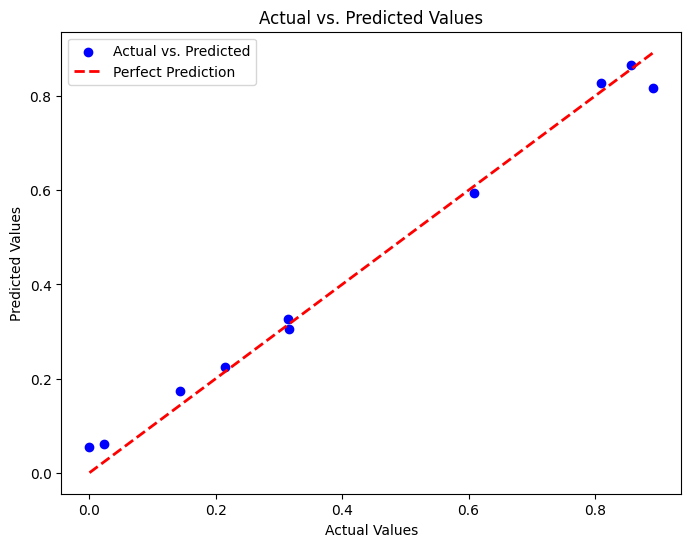

In [77]:
import matplotlib.pyplot as plt

# Assuming predictions_test contains your model's predictions for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions_test, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()
